In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def file_to_df(file):
    results = np.load(file, allow_pickle=True).item()
    thrs = results['thrs']
    dist_errs = results['distance_errs_at_thrs']
    count_errs = results['count_errs_at_thrs']
    df = pd.DataFrame()
    df['thrs'] = thrs
    df['num_peaks'] = [len(dist_err) for dist_err in dist_errs]
    df['mean_dist_err'] = [np.mean(dist_err) for dist_err in dist_errs]
    df['median_dist_err'] = [np.median(dist_err) for dist_err in dist_errs]
    df['mean_count_err'] = [np.mean(count_err) for count_err in count_errs]
    df['err_samples'] = dist_errs
    return df

In [154]:
df1 = file_to_df('results/cross-session-heart.npy')
df2 = file_to_df('results/cross-session-wrist-1dnorm.npy')

/home/kyuan/anaconda3/envs/torch310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/kyuan/anaconda3/envs/torch310/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/kyuan/anaconda3/envs/torch310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/kyuan/anaconda3/envs/torch310/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


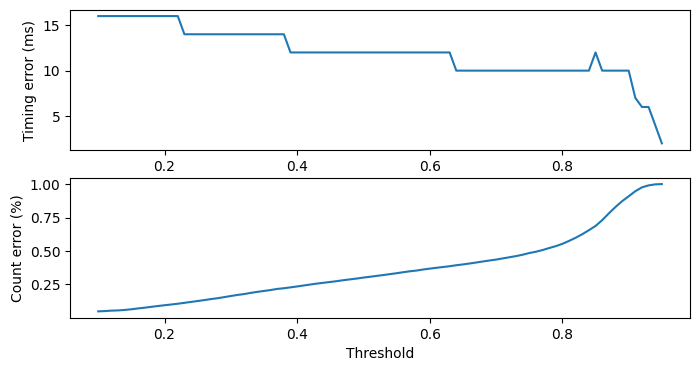

In [155]:
df = df1
plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
# plt.plot(df['thrs'], df['mean_dist_err']*2, label='mean')
plt.plot(df['thrs'], df['median_dist_err']*2, label='median')
plt.xlabel('threshold')
plt.ylabel('Timing error (ms)')
# plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['thrs'], df['mean_count_err'])
plt.xlabel('Threshold')
plt.ylabel('Count error (%)')
plt.show()

thrs                                                            0.65
num_peaks                                                       5681
mean_dist_err                                              20.038549
median_dist_err                                                  5.0
mean_count_err                                              0.399598
err_samples        [15.0, 12.0, 1.0, 12.0, 74.0, 11.0, 12.0, 1.0,...
Name: 55, dtype: object
thrs                                                            0.15
num_peaks                                                       5999
mean_dist_err                                              56.641441
median_dist_err                                                 38.0
mean_count_err                                              0.384129
err_samples        [18.0, 5.0, 36.0, 100.0, 38.0, 26.0, 21.0, 4.0...
Name: 5, dtype: object


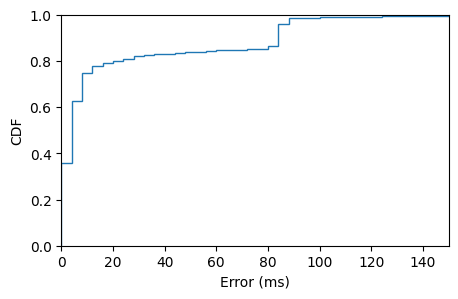

In [165]:
err_rate_level = 0.4

idx = np.argmin(np.abs(df1['mean_count_err'] - err_rate_level))
err_samples1 = df1['err_samples'][idx]
print(df1.iloc[idx])
idx = np.argmin(np.abs(df2['mean_count_err'] - err_rate_level))
err_samples2 = df2['err_samples'][idx]
print(df2.iloc[idx])
# idx = np.argmin(np.abs(df3['mean_count_err'] - err_rate_level))
# err_samples3 = df3['err_samples'][idx]
# print(df3.iloc[idx])
# plot the cdf
plt.figure(figsize=(5, 3))
plt.hist(err_samples1, bins=100, density=True, histtype='step', cumulative=True)
# plt.hist(err_samples2, bins=100, density=True, histtype='step', cumulative=True)
# plt.hist(err_samples3*2, bins=100, range=(0, 100), density=True, histtype='step', cumulative=True)
plt.xlabel('Error (ms)')
plt.ylabel('CDF')
plt.xlim([0, 150])
plt.ylim([0, 1])
# plt.legend(['head', 'heart', 'wrist'])
plt.show()

In [157]:
df1

,thrs,num_peaks,mean_dist_err,median_dist_err,mean_count_err,err_samples
0,0.10,9355,34.948154,8.0,0.048992,"[1.0, 1.0, 5.0, 15.0, 8.0, 3.0, 9.0, 12.0, 1.0..."
1,0.11,9301,34.506721,8.0,0.051040,"[1.0, 1.0, 5.0, 15.0, 8.0, 3.0, 9.0, 12.0, 1.0..."
2,0.12,9242,34.091324,8.0,0.054337,"[1.0, 1.0, 5.0, 15.0, 8.0, 3.0, 9.0, 12.0, 1.0..."
3,0.13,9199,33.707142,8.0,0.056098,"[1.0, 1.0, 5.0, 15.0, 8.0, 3.0, 9.0, 12.0, 1.0..."
4,0.14,9149,33.427589,8.0,0.059587,"[1.0, 1.0, 5.0, 15.0, 8.0, 3.0, 9.0, 12.0, 1.0..."
...,...,...,...,...,...,...
81,0.91,518,20.252895,3.5,0.946622,"[4.0, 5.0, 1.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, ..."
82,0.92,246,22.211382,3.0,0.975317,"[9.0, 8.0, 7.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, ..."
83,0.93,100,22.059999,3.0,0.990047,"[9.0, 8.0, 1.0, 1.0, 1.0, 0.0, 0.0, 2.0, 3.0, ..."
84,0.94,23,10.521739,2.0,0.997678,"[8.0, 1.0, 0.0, 3.0, 2.0, 1.0, 2.0, 2.0, 1.0, ..."
